In [1]:
import sys
sys.path.append('..')

from PIL import Image
from torchvision import transforms as tfs

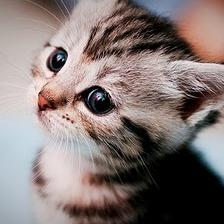

In [3]:
im=Image.open('./cat.png')
im

before scale,shape:(224, 224)
after scale,shape:(200, 100)


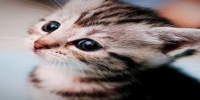

In [5]:
print('before scale,shape:{}'.format(im.size))
new_im=tfs.Resize((100,200))(im)
print('after scale,shape:{}'.format(new_im.size))
new_im

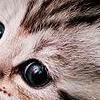

In [6]:
#随机截取 传入的参数是截取的图像的长宽高
random_im1=tfs.RandomCrop(100)(im)
random_im1

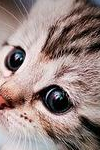

In [7]:
# 随机裁剪出 150 x 100 的区域
random_im2 = tfs.RandomCrop((150, 100))(im)
random_im2

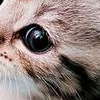

In [8]:
center_im=tfs.CenterCrop(100)(im)
center_im

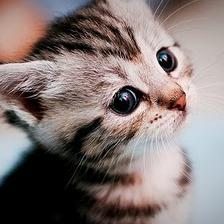

In [11]:
h_filp=tfs.RandomHorizontalFlip()(im)
h_filp

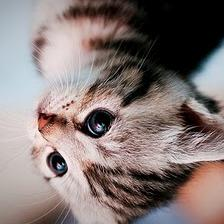

In [12]:
v_flip=tfs.RandomVerticalFlip()(im)
v_flip

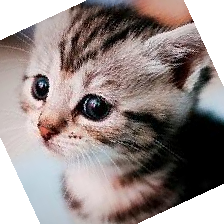

In [18]:
rot_im=tfs.RandomRotation(45)(im)
rot_im

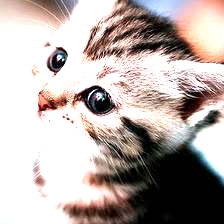

In [19]:
bright_im=tfs.ColorJitter(brightness=1)(im)
bright_im

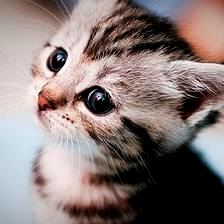

In [20]:
contrast_im=tfs.ColorJitter(contrast=1)(im)
contrast_im

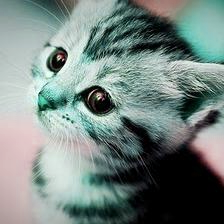

In [25]:
color_im=tfs.ColorJitter(hue=0.5)(im)
color_im

In [26]:
im_aug=tfs.Compose([
    tfs.Resize(120),
    tfs.RandomHorizontalFlip(),
    tfs.RandomCrop(96),
    tfs.ColorJitter(brightness=0.5,contrast=0.5,hue=0.5,saturation=0.5)
])

In [27]:
import matplotlib.pyplot as plt
%matplotlib inline

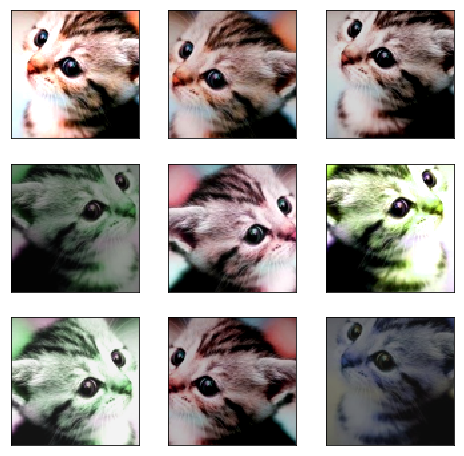

In [30]:
nrows=3
ncols=3
figsize=(8,8)
_,figs=plt.subplots(nrows,ncols,figsize=figsize)

for i in range(nrows):
    for j in range(ncols):
        figs[i][j].imshow(im_aug(im))
        figs[i][j].axes.get_xaxis().set_visible(False)
        figs[i][j].axes.get_yaxis().set_visible(False)
plt.show()

In [31]:
import numpy as np
import torch
from torch import nn
import torch.nn.functional as F
from torch.autograd import Variable
from torchvision.datasets import CIFAR10
from utils import train, resnet
from torchvision import transforms as tfs

In [32]:
def train_tf(x):
    im_aug=tfs.Compose([
        tfs.Resize(120),
        tfs.RandomHorizontalFlip(),
        tfs.RandomCrop(96),
        tfs.ColorJitter(brightness=0.5,contrast=0.5,hue=0.5),
        tfs.ToTensor(),
        tfs.Normalize([0.5,0.5,0.5],[0.5,0.5,0.5])
    ])
    x=im_aug(x)
    return x
def test_tf(x):
    im_aug=tf.Compose([
        tfs.Resize(96),
        tfs.ToTensor(),
        tfs.Normalize([0.5,0.5,0.5],[0.5,0.5,0.5])
    ])
    x=im_aug(x)
    return x

train_set=CIFAR10('./data',train=True,transform=train_tf)
train_data=torch.utils.data.DataLoader(train_set,batch_size=64,shuffle=True)
test_set=CIFAR10('./data',train=False,transform=test_tf)
test_data=torch.utils.data.DataLoader(test_set,batch_size=128,shuffle=False)

net=resnet(3,10)
optimizer=torch.optim.SGD(net.parameters(),lr=0.01)
criterion=nn.CrossEntropyLoss()

In [ ]:
train(net, train_data, test_data, 10, optimizer, criterion)

In [ ]:
# 不使用数据增强
def data_tf(x):
    im_aug = tfs.Compose([
        tfs.Resize(96),
        tfs.ToTensor(),
        tfs.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])
    ])
    x = im_aug(x)
    return x

train_set = CIFAR10('./data', train=True, transform=data_tf)
train_data = torch.utils.data.DataLoader(train_set, batch_size=64, shuffle=True)
test_set = CIFAR10('./data', train=False, transform=data_tf)
test_data = torch.utils.data.DataLoader(test_set, batch_size=128, shuffle=False)

net = resnet(3, 10)
optimizer = torch.optim.SGD(net.parameters(), lr=0.01)
criterion = nn.CrossEntropyLoss()

In [ ]:
train(net, train_data, test_data, 10, optimizer, criterion)